In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from imblearn.metrics import specificity_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('titanic_preprocesamiento.csv')
df.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Survived
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0


In [3]:
df.isna().sum()

Age                        0
Pclass                     0
Ticket                     0
Sibsp                      0
Parch                      0
Sex_female                 0
Sex_male                   0
Log_Fare                   0
Embark_Town_Cherbourg      0
Embark_Town_Queenstown     0
Embark_Town_Southampton    0
Survived                   0
dtype: int64

In [4]:
#Clasificacion binaria 
# 0 no sobrevivio 
# 1 Si sobrevivio
X = df.drop('Survived', axis= 1)  # columnas predictoras, nos ayudan a prededir


In [5]:
y= df['Survived']

In [6]:
#para saber cuan valanceado esta una columna en cuanto a la ocurrencia de sus valores
df['Survived'].value_counts()

Survived
0.0    535
1.0    341
Name: count, dtype: int64

LogisticRegresion es un algoritmo de clasificacion

Parte lineal:similar a la regresion leneal, combina linealmente las columnas del dataframe

z = w0 + w1 * x1 + w2 * x2 + wn * xn

Parte logistica: (funcion sigmoide)

sigmoide(z) = 1 / (1 + e ^ -z)

Esto os da un numero entre 0 y 1 que seria la probabilidad de pertenecer a la calse 0 ó 1

* si la probabilidad es mayor a 0.5 entonces se clasifica como clase 1 
* si la probabilidad es menor a 0.5 entonces se clasifica como clase 0

In [7]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8295454545454546


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
#si se quiere reducir el warning de la celda anterior se le puede pasar un max_iter y un C

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000, C=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8352272727272727


In [9]:
# imprimir matriz de confusion (PRIMERO)
print(f'matriz confusion: {confusion_matrix(y_test, y_pred)}')

matriz confusion: [[99 16]
 [13 48]]


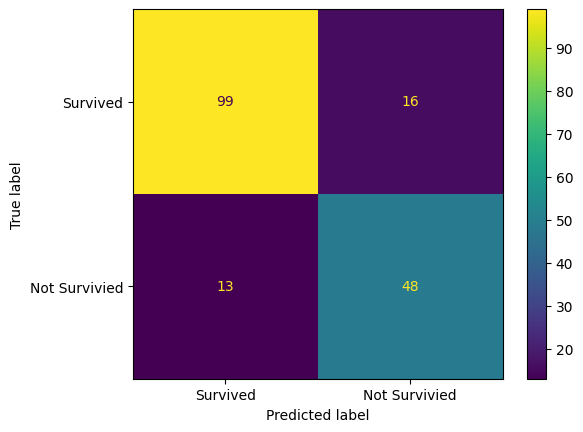

In [10]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survived', 'Not Survivied']) #(SEGUNDO)
cmd.plot()
# 98 personas sobrevivieron y el modelo dijo que sobrevivian Verdadesto positivo (TP)
# 48 personas no sobrevivieron y el modelo dijo que no sobrevivian Verdaderos negativo (TN)
# 17 personas sobrevivieron y el modelo Dijo que no sobrevivian Falso negativo (FN)
# 13 personas no sobrevivieron y el modelo dijo que sobrevivieron Falso positivo (FP)


In [11]:
#Para la clase 1 (survived) el modelo tiene peores puntuaciones
#suport indica el numero de registros filas 
print(classification_report(y_test, y_pred)) #(TERCERO)

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       115
         1.0       0.75      0.79      0.77        61

    accuracy                           0.84       176
   macro avg       0.82      0.82      0.82       176
weighted avg       0.84      0.84      0.84       176



Accuracy : Exactitud, cantidad de muestras que el modelo clasifica correctamente
accuracy = nro de aciertos / numero total de muestras
accuracy = TP+TN / total

In [12]:
#exactitud, ratio de acierto
print (f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8352272727272727


Precision: De todas las observaciones que el modelo p'redijo como positivos, cuantos son realmente positivos
Precision = TP / TP+FP

In [13]:
precision_score(y_test, y_pred)

0.75

Recall: sensibilidad similar a la precision
recall = TP / TP+FN

In [14]:
recall_score(y_test, y_pred)

0.7868852459016393

F1 score : se usa en medicina, especial para desbalanceo de clases, metrica mas confiable, media armonica entre precision y recall

F1 score = precision*recall / precision+recall

cuando el f1 da por debajo del accuracy esta diciendo que hay una clase desvalanceada

In [15]:
f1_score(y_test, y_pred)

0.768

ROC - AUC
Curva que ilustra el rendimiento del clasificador en distintos umbrales de decision
 TPR : True positive ratio
 FPR : False positive ratio
 ideal TPR=1 y FPR= 0
 AUC Area under the curve
 AUC = 1 perfecto
 AUC = 0.5 malo, igual que tomar una decision aleatoria
 AUC < 0.5 peor que aleatorio, posible problema en el modelo



In [16]:

auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc}')

AUC: 0.8238774055595153


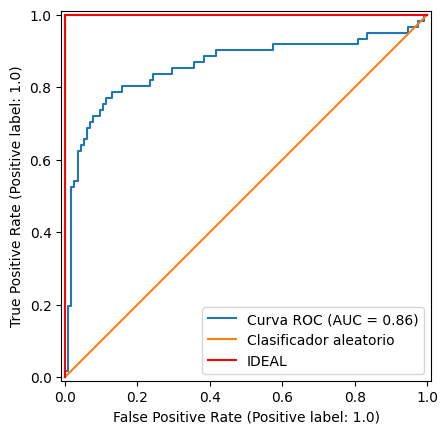

In [17]:
#grafico que muestra que tan bien el modelo diferencia entre las clases: 
# Eje x:FPR tasa de falsos positivos 
# Eje y:TPR tasa de verdaderos positivos
# Nos interesa que la diagonal este en (0,0) y vaya a (0,1) sin curva
#INTERPRETACION cuanto mas cerca de la esq sup izq mejor 
RocCurveDisplay.from_estimator(model, X_test, y_test, name='Curva ROC')
plt.plot([0,1], [0,1], label='Clasificador aleatorio')
plt.plot([0,0], [0,1], color='red')
plt.plot([0,1], [1,1], color='red', label='IDEAL')
plt.legend()

In [18]:
model.predict(X_test)

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1.])

In [19]:
model.predict_proba(X_test)

array([[0.3026909 , 0.6973091 ],
       [0.8486708 , 0.1513292 ],
       [0.65005316, 0.34994684],
       [0.8742781 , 0.1257219 ],
       [0.81973116, 0.18026884],
       [0.10962072, 0.89037928],
       [0.83377094, 0.16622906],
       [0.57245842, 0.42754158],
       [0.89774495, 0.10225505],
       [0.57420371, 0.42579629],
       [0.3998182 , 0.6001818 ],
       [0.40456975, 0.59543025],
       [0.75910754, 0.24089246],
       [0.5738596 , 0.4261404 ],
       [0.78489394, 0.21510606],
       [0.42723275, 0.57276725],
       [0.54445547, 0.45554453],
       [0.57224226, 0.42775774],
       [0.31157651, 0.68842349],
       [0.14319529, 0.85680471],
       [0.83593471, 0.16406529],
       [0.86425213, 0.13574787],
       [0.80099098, 0.19900902],
       [0.3474469 , 0.6525531 ],
       [0.9183904 , 0.0816096 ],
       [0.89231487, 0.10768513],
       [0.85072325, 0.14927675],
       [0.38192007, 0.61807993],
       [0.43918288, 0.56081712],
       [0.86252466, 0.13747534],
       [0.

In [20]:
#hacer predict sobre un pasajero ficticio y saber a que clase pertenece
X_new = pd.DataFrame([[22.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.110213, 1.0, 0.0, 0.0]], columns=X.columns)
print(model.predict(X_new)) # 0 no sobrevivio
print(model.predict_proba(X_new )) #[0.875, 0.125] 87,5% que no sobrevivi y 12,5% que sobreviva

[0.]
[[0.85944892 0.14055108]]


In [21]:
model.intercept_
model.coef_


array([[-0.04799952, -1.01726433, -0.3566783 , -0.1112087 , -0.00216403,
         1.14718709, -1.14140647,  0.39639309, -0.10436136,  0.06498837,
        -0.11191646]])

# Comparar modelos clasificacion

In [22]:
df_resultados = pd.DataFrame(columns=['Modelo', 'accuracy', 'precision', 'recall', 'f1', 'AUC'])

def calculate_metrics(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    df_resultados.loc[len(df_resultados)] = [name, accuracy, precision, recall, f1, auc]

In [23]:
model = LogisticRegression(max_iter=1000, C=0.01)
calculate_metrics('RL', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436


In [24]:
model = KNeighborsClassifier(n_neighbors=3)
calculate_metrics('KNN k=3', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k=3,0.704545,0.565217,0.639344,0.600000,0.689237


In [25]:
model = KNeighborsClassifier(n_neighbors=5)
calculate_metrics('KNN k=5', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k=3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k=5,0.750000,0.634921,0.655738,0.645161,0.727869


Text(0.5, 0, 'k n_neighbors')

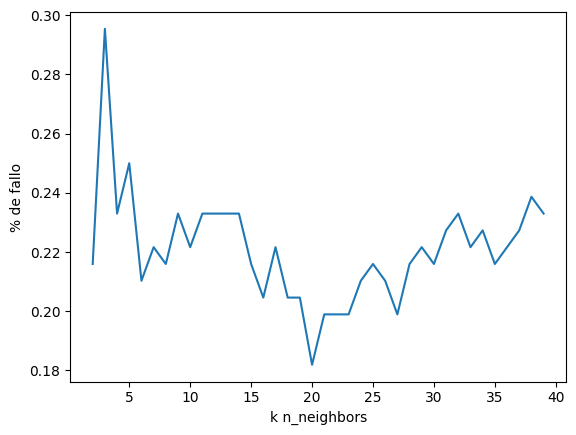

In [26]:
# elbow method o metodo del codo
errors = []
for k in range(2, 40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    errors.append(error)
    
plt.plot(range(2,40),errors)
plt.ylabel('% de fallo')
plt.xlabel('k n_neighbors')

In [27]:
#se busca el mas bajo porque es el que tiene menor error
model = KNeighborsClassifier(n_neighbors=20)
calculate_metrics('KNN k=20', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k=3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k=5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k=20,0.818182,0.822222,0.606557,0.698113,0.768496


# Árbol de decisión
utiliza criterion='gini' al ser clasificacion
Gini = 0 significa que el nodo es completamente puro, contiene datos de una sola clase
Gini > 0 indica que hay mezcla de clases. Cuanto mayor sea el valor, mayor será la impureza
Dini es una medida de impureza o m3excla de clases en un nodo de un árbol. 
Propósito: evaluar que tan puras son las divisiones de un nodo

* feature_importances_ importancia de cada columna en la x a la hora de hacer la partición, se calcula usando la impureza o la entropía

* classes_  enumera las clases

* tree_ arbol

metodos:
get_depth()  profundidad

DesicionTreeClassifier()

In [28]:
model = DecisionTreeClassifier(max_depth=10)
calculate_metrics('DT depth 10', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k=3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k=5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k=20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT depth 10,0.863636,0.793651,0.819672,0.806452,0.853314


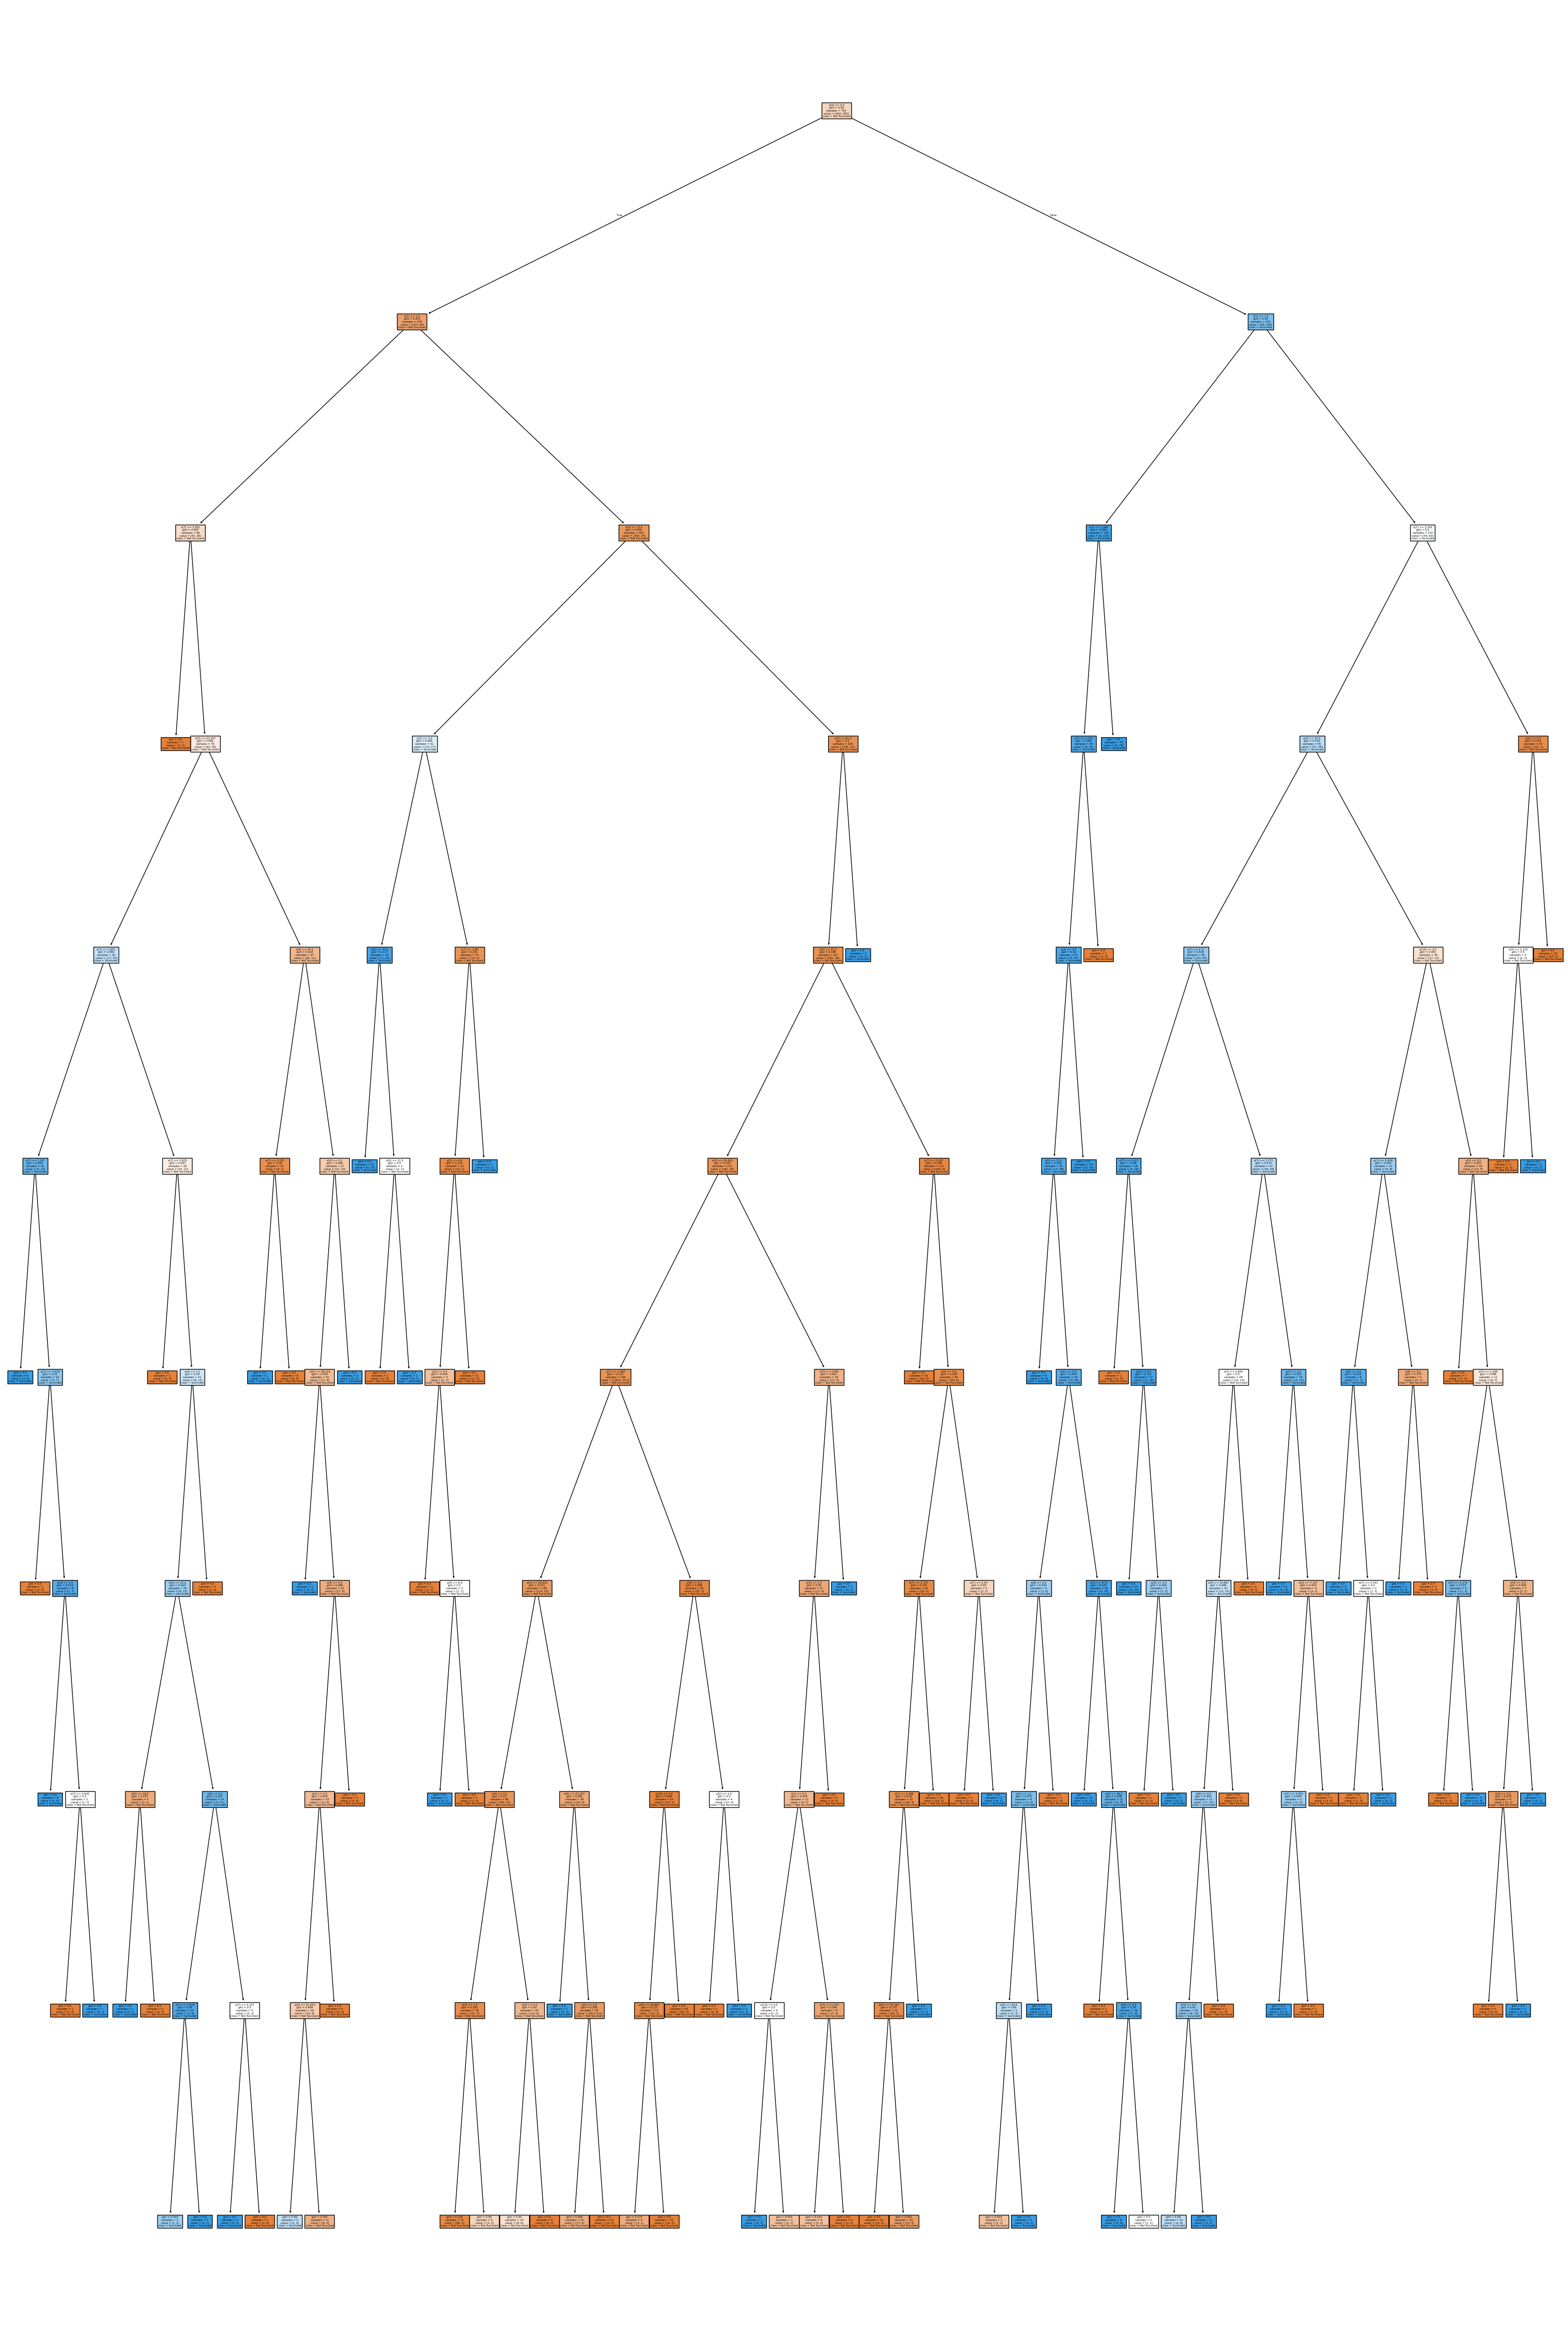

In [29]:
plt.figure(figsize=(40, 60))
plot_tree(model, filled=True, class_names=['Not Survived', 'Survivied']);

In [30]:
#saca un array
model.feature_importances_
for col, imp in zip(X.columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: Age Importancia: 0.16821919586762166
Columna: Pclass Importancia: 0.12940116527261544
Columna: Ticket Importancia: 0.04935791743948794
Columna: Sibsp Importancia: 0.041372262316535395
Columna: Parch Importancia: 0.039203623913178595
Columna: Sex_female Importancia: 0.34054804757362267
Columna: Sex_male Importancia: 0.0
Columna: Log_Fare Importancia: 0.18909561209435433
Columna: Embark_Town_Cherbourg Importancia: 0.015496609485972276
Columna: Embark_Town_Queenstown Importancia: 0.016789672828167942
Columna: Embark_Town_Southampton Importancia: 0.010515893208443644


In [31]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=20)
calculate_metrics('RF 200', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k=3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k=5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k=20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT depth 10,0.863636,0.793651,0.819672,0.806452,0.853314
5,RF 200,0.852273,0.777778,0.803279,0.790323,0.840770


In [32]:
for col, imp in zip(X.columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: Age Importancia: 0.1475106541116812
Columna: Pclass Importancia: 0.12530644101487703
Columna: Ticket Importancia: 0.07007474461900996
Columna: Sibsp Importancia: 0.02354132474072378
Columna: Parch Importancia: 0.017677942387376685
Columna: Sex_female Importancia: 0.19996101679745923
Columna: Sex_male Importancia: 0.2322935580113209
Columna: Log_Fare Importancia: 0.15756873572047514
Columna: Embark_Town_Cherbourg Importancia: 0.00611926262298785
Columna: Embark_Town_Queenstown Importancia: 0.009830773359928583
Columna: Embark_Town_Southampton Importancia: 0.010115546614159613


## SVC
C grande penaliza fuertemente por errores, lo que implicará un margen mas pequeño
C pequeño permite clasificaciones incorrectas o puntos dentro del margen para obtener un m,argen mas amplio y que generalice mejor


In [33]:
model = SVC()
calculate_metrics('SVC 1', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k=3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k=5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k=20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT depth 10,0.863636,0.793651,0.819672,0.806452,0.853314
5,RF 200,0.852273,0.777778,0.803279,0.790323,0.840770
6,SVC 1,0.795455,0.878788,0.475410,0.617021,0.720314


In [34]:
model = SVC(C=100)
calculate_metrics('SVC 100', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k=3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k=5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k=20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT depth 10,0.863636,0.793651,0.819672,0.806452,0.853314
5,RF 200,0.852273,0.777778,0.803279,0.790323,0.840770
6,SVC 1,0.795455,0.878788,0.475410,0.617021,0.720314
7,SVC 100,0.840909,0.770492,0.770492,0.770492,0.824376


# Exportar el modelo final

In [35]:
from joblib import dump, load

model = RandomForestClassifier(n_estimators=200, min_samples_split=20)
model.fit(X, y)



RandomForestClassifier(min_samples_split=20, n_estimators=200)

In [36]:
# exportar el modelo
dump(model, 'Clasificador_titanic_rf.joblib')

['Clasificador_titanic_rf.joblib']

In [37]:
#importar el modelo
# este load lo hariamos en otra aplicacion u otro lugar
model = load('Clasificador_titanic_rf.joblib')

In [38]:
# prediccion
X_new = pd.DataFrame([[22.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.110213, 1.0, 0.0, 0.0]], columns=X.columns)
model.predict(X_new)

array([0.])

In [39]:
model.predict_proba(X_new)

array([[0.96627139, 0.03372861]])

Librerias para exportar y cargar modelos:

* joblib: especifica para serializar grandes objetos Python como modelos ML (Machine Learning)
* pickle: genérico, no solo para modelos ML, tambien para datos numericos, integrado en Python. Mas lentos que joblib para arrays grandes de Numpy y no comprime datos por defecto.
* hdf5 es un formato que genera archivos .h5 mas ideal para modelos de Tensorflow/Keras